# The Sparks Foundation : GRIP

## Name: Janhavi Deshmukh
## Task : Prediction using Unsupervised ML

### Introduction

Unsupervised machine learning algorithms are those that learn patterns from unlabeled data. 


In this task, I will use an unsupervised ML algorithm called K-Means Clustering to cluster the given dataset into the optimum number of clusters. K-means is a method to divide data points into K clusters/groups.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset
iris=pd.read_csv('Iris.csv')


In [3]:
#information about the data set
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#viewing first 5 rows
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#viewing last 5 rows
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
#statistics
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


For clustering the data, the ID and species columns are not required. The clusters will be formed on the basis of sepal length, petal length, sepal width and petal width.

In [6]:
#dropping ID and species
iris_data=iris.drop(['Id','Species'],axis=1)
iris_data=iris_data.values


### Step 1: Finding the optimum number of clusters

The first step in a K-Means algorithm is to find the optimum number of clusters, which can be done using the Within Cluster Sum of Squares (WCSS) and the elbow method.

In K-Means Clustering, clusters are formed by comparing distance of a data point from a cluster's centroid. WCSS is the sum of distances of each data point to their corresponding cluster centroid. This sum has to minimised so that each point is in its optimal cluster. WCSS is calculated for different values of K and plotted. This yields an elbow point graph.

The centroids for this calculation are intialised randomly. This can lead to the formation of completely different, unexpected cluster formations.
A solution to this is the K-Means++ algorithm, that chooses the initial centroids.

In [7]:
#Finding optimum number of clusters using WCSS, K-Means++ algorithm used for initialisation
from sklearn.cluster import KMeans

wcss=[] #empty list to append wcss for each K value
#K ranges from 1 to 10
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=1)
    #fitting data into the current model
    km.fit(iris_data)
    wcss.append(km.inertia_)


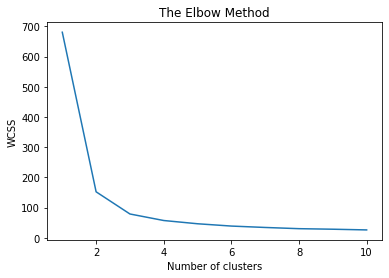

In [8]:
#plotting the elbow point graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As the value of K increases, WCSS decreases.
The value of K is chosen on the basis of the rate of decrease in WCSS. The K after which the decrease in WCSS is subtle is selected.

In this case, K=3.

### Step 2: Fitting the K-Means Classifier

In [21]:
#fitting model to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
y_kmeans=kmeans.fit_predict(iris_data)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Here, the data points have been assigned to their respective clusters, with the labels 0,1 and 2.

### Step 3: Visualisation

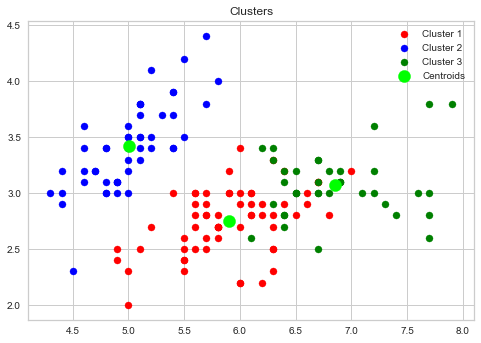

In [23]:
# visualising the clusters

plt.scatter(iris_data[y_kmeans == 0, 0], iris_data[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

plt.scatter(iris_data[y_kmeans == 1, 0], iris_data[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')

plt.scatter(iris_data[y_kmeans == 2, 0], iris_data[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'lime', label = 'Centroids')


plt.title('Clusters')

plt.legend()
plt.show()